<a href="https://colab.research.google.com/github/hamiin47/Assignment/blob/main/ESAA_YB_Week3_0920_markdown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **datetime 오브젝트**
- 날짜와 시간을 처리하는 등의 다양한 기능을 제공하는 파이썬 라이브러리
- 날짜를 처리하는 date 오브젝트 / 시간을 처리하는 time 오브젝트 / 날짜와 시간을 모두 처리하는 datetime 오브젝트로 구성

In [11]:
from datetime import datetime

now1 = datetime.now()
print(now1)

2024-09-22 03:16:00.009777


In [12]:
now2 = datetime.today()
print(now2)

2024-09-22 03:16:00.909004


In [13]:
t1 = datetime.now()
t2 = datetime(1970, 1, 1)
t3 = datetime(1970, 12, 12, 13, 24, 34)

print(t1)
print(t2)
print(t3)

2024-09-22 03:16:00.918058
1970-01-01 00:00:00
1970-12-12 13:24:34


In [14]:
diff1 = t1 - t2

print(diff1)
print(type(diff1))

19988 days, 3:16:00.918058
<class 'datetime.timedelta'>


In [15]:
diff2 = t2 - t1
print(diff2)
print(type(diff2))

-19989 days, 20:43:59.081942
<class 'datetime.timedelta'>


# **to_datetime 메서드**

- 시계열 데이터를 문자열로 저장해야할 때가 있음
- 그러나 문자열은 시간 계산을 할 수 없기 때문에 datetime 오브젝트로 변환해주어야함
- to_datetime()이용

In [16]:
import pandas as pd
import os

ebola = pd.read_csv('/content/drive/MyDrive/country_timeseries.csv')
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [17]:
#date열의 자료형을 datetime 오브젝트로 변환
ebola['date_dt'] = pd.to_datetime(ebola['Date'])
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [18]:
test_df1 = pd.DataFrame({'order_day':['01/01/15', '02/01/15', '03/01/15']})

test_df1['date_df1'] = pd.to_datetime(test_df1['order_day'], format='%d/%m/%y')
test_df1['date_df2'] = pd.to_datetime(test_df1['order_day'], format='%m/%d/%y')
test_df1['date_df3'] = pd.to_datetime(test_df1['order_day'], format='%y/%m/%d')

print(test_df1)

  order_day   date_df1   date_df2   date_df3
0  01/01/15 2015-01-01 2015-01-01 2001-01-15
1  02/01/15 2015-01-02 2015-02-01 2002-01-15
2  03/01/15 2015-01-03 2015-03-01 2003-01-15


In [19]:
test_df2 = pd.DataFrame({'order_day':['01-01-15', '02-01-15', '03-01-15']})
test_df2['date_dt'] = pd.to_datetime(test_df2['order_day'], format='%d-%m-%y')
print(test_df2)

  order_day    date_dt
0  01-01-15 2015-01-01
1  02-01-15 2015-01-02
2  03-01-15 2015-01-03


# **시간 형식 지정자**
- %a / %A / %w ..

In [20]:
#strftime메서드와 시간 형식 지정자를 이용하여 시계열 데이터를 잘라냄
now = datetime.now()
print(now)

2024-09-22 03:16:01.030676


In [21]:
nowDate = now.strftime('%Y-%m-%d')
print(nowDate)

2024-09-22


In [22]:
nowTime = now.strftime('%H:%M:%S')
print(nowTime)

03:16:01


In [23]:
nowDatetime = now.strftime('%Y-%M-%d %H:%M:%S')
print(nowDatetime)

2024-16-22 03:16:01


# **read.csv 메서드**
- parse_dates 인자에 datetime오브젝트로 변환하고자 하는 열의 이름을 전달

In [25]:
ebola1 = pd.read_csv('/content/drive/MyDrive/country_timeseries.csv', parse_dates=['Date'])
print(ebola1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

문자열로 지정된 날짜를 **시리즈**에 담아 datetime 오브젝트로 변환


In [26]:
date_series = pd.Series(['2018-05-16', '2018-05-17', '2018-05-18'])
d1 = pd.to_datetime(date_series)
print(d1)

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]


d1의 year,month,day 속성을 이용하여 년,월.일 정보를 바로 추출

In [27]:
print(d1[0].year)
print(d1[0].month)
print(d1[0].day)

2018
5
16


# **dt접근자**
- 문자열을 처리하기 위해 str접근자를 사용한 후 문자열 속성이나 메서드 사용
- datetime오브젝트는 **dt접근자**를 사용하여 datetime 속성이나 메서드를 사용하여 시계열 데이터 처리

In [28]:
#date 열을 datetime 오브젝트로 변환하여 새로운 열(date_dt)추가
ebola = pd.read_csv('/content/drive/MyDrive/country_timeseries.csv')
ebola['date_dt'] = pd.to_datetime(ebola['Date'])

In [29]:
print(ebola[['Date', 'date_dt']].head())

         Date    date_dt
0    1/5/2015 2015-01-05
1    1/4/2015 2015-01-04
2    1/3/2015 2015-01-03
3    1/2/2015 2015-01-02
4  12/31/2014 2014-12-31


In [31]:
print(ebola['date_dt'][3].year)
print(ebola['date_dt'][3].month)
print(ebola['date_dt'][3].day)

2015
1
2


In [32]:
#dt 접근자로 date_dt 열에 한번에 접근하여 year 속성을 이용
ebola['year'] = ebola['date_dt'].dt.year
print(ebola[['Date', 'date_dt', 'year']].head())

         Date    date_dt  year
0    1/5/2015 2015-01-05  2015
1    1/4/2015 2015-01-04  2015
2    1/3/2015 2015-01-03  2015
3    1/2/2015 2015-01-02  2015
4  12/31/2014 2014-12-31  2014


In [34]:
#월,일 데이터를 한번에 추출하여 열로 추가
ebola['month'], ebola['day'] = (ebola['date_dt'].dt.month, ebola['date_dt'].dt.day)
print(ebola[['Date', 'date_dt', 'year', 'month', 'day']].head())

         Date    date_dt  year  month  day
0    1/5/2015 2015-01-05  2015      1    5
1    1/4/2015 2015-01-04  2015      1    4
2    1/3/2015 2015-01-03  2015      1    3
3    1/2/2015 2015-01-02  2015      1    2
4  12/31/2014 2014-12-31  2014     12   31


In [35]:
#새로 추가한 열의 자료형을 출력
#date_df열은 datetime 오브젝트이고 나머지는 정수형

print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

# **시계열 데이터 계산하기**

In [36]:
#시간 순으로 데이터를 살펴보기 위해 데이터프레임의 마지막부터 살펴봄
print(ebola.iloc[-5:, :5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117  3/27/2014    5         103.0            8.0                6.0
118  3/26/2014    4          86.0            NaN                NaN
119  3/25/2014    3          86.0            NaN                NaN
120  3/24/2014    2          86.0            NaN                NaN
121  3/22/2014    0          49.0            NaN                NaN


In [38]:
#min 메서드를 통해 에볼라 최초 발병일을 찾음
print(ebola['date_dt'].min())
print(type(ebola['date_dt'].min()))

2014-03-22 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [39]:
#date열에서 에볼라 최초 발병일을 빼면 에볼라의 진행정도를 알 수 있음
ebola['outbreak_d'] = ebola['date_dt'] - ebola['date_dt'].min()
print(ebola[['Date', 'Day', 'outbreak_d']].head())

         Date  Day outbreak_d
0    1/5/2015  289   289 days
1    1/4/2015  288   288 days
2    1/3/2015  287   287 days
3    1/2/2015  286   286 days
4  12/31/2014  284   284 days


**파산한 은행 데이터 분석**

In [45]:
#파산한 은행 데이터의 집합
#Closing Date, Updated Date열의 데이터 자료형이 시계열 데이터임을 알 수 있음

banks = pd.read_csv('/content/drive/MyDrive/banklist.csv')
print(banks.head())


                                           Bank Name                City  ST  \
0                                Fayette County Bank          Saint Elmo  IL   
1  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...           Milwaukee  WI   
2                                     First NBC Bank         New Orleans  LA   
3                                      Proficio Bank  Cottonwood Heights  UT   
4                      Seaway Bank and Trust Company             Chicago  IL   

    CERT                Acquiring Institution Closing Date Updated Date  
0   1802            United Fidelity Bank, fsb    26-May-17     1-Jun-17  
1  30003  First-Citizens Bank & Trust Company     5-May-17     1-Jun-17  
2  58302                         Whitney Bank    28-Apr-17    23-May-17  
3  35495                    Cache Valley Bank     3-Mar-17    18-May-17  
4  19328                  State Bank of Texas    27-Jan-17    18-May-17  


In [47]:
#parse_dates 속성을 이용하여 문자열로 저장된 두 열을 datetime 오브젝트로 변환
banks_no_dates = pd.read_csv('/content/drive/MyDrive/banklist.csv')
print(banks_no_dates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              551 non-null    object
 1   City                   551 non-null    object
 2   ST                     551 non-null    object
 3   CERT                   551 non-null    int64 
 4   Acquiring Institution  551 non-null    object
 5   Closing Date           551 non-null    object
 6   Updated Date           551 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.3+ KB
None


In [48]:
banks = pd.read_csv('/content/drive/MyDrive/banklist.csv',parse_dates=[5,6])
print(banks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              551 non-null    object        
 1   City                   551 non-null    object        
 2   ST                     551 non-null    object        
 3   CERT                   551 non-null    int64         
 4   Acquiring Institution  551 non-null    object        
 5   Closing Date           551 non-null    datetime64[ns]
 6   Updated Date           551 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.3+ KB
None


<ipython-input-48-eb39dca4529f>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  banks = pd.read_csv('/content/drive/MyDrive/banklist.csv',parse_dates=[5,6])
<ipython-input-48-eb39dca4529f>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  banks = pd.read_csv('/content/drive/MyDrive/banklist.csv',parse_dates=[5,6])


In [50]:
#dt접근자와 quarter속성을 이용하여 은행의 파산한 분기를 알 수 있음
banks['closing_quarter'], banks['closing_year'] = (banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year)
print(banks.head())

                                           Bank Name                City  ST  \
0                                Fayette County Bank          Saint Elmo  IL   
1  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...           Milwaukee  WI   
2                                     First NBC Bank         New Orleans  LA   
3                                      Proficio Bank  Cottonwood Heights  UT   
4                      Seaway Bank and Trust Company             Chicago  IL   

    CERT                Acquiring Institution Closing Date Updated Date  \
0   1802            United Fidelity Bank, fsb   2017-05-26   2017-06-01   
1  30003  First-Citizens Bank & Trust Company   2017-05-05   2017-06-01   
2  58302                         Whitney Bank   2017-04-28   2017-05-23   
3  35495                    Cache Valley Bank   2017-03-03   2017-05-18   
4  19328                  State Bank of Texas   2017-01-27   2017-05-18   

   closing_quarter  closing_year  
0                2          2017 

In [53]:
#groupby 메서드를 이용하여 연도별로 파산한 은행의 개수를 구할 수 있음
closing_year = banks.groupby(['closing_year']).size()
print(closing_year)

closing_year
2000      2
2001      3
2002     10
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      6
dtype: int64


In [54]:
#각 연도별, 분기별 파산한 은행의 개수
#banks 데이터프레임을 연도별로 그룹화한 다음 다시 분기별로 그룹화하여 출력
closing_year_q = banks.groupby(['closing_year', 'closing_quarter']).size()
print(closing_year_q)

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   1
2002          1                   6
              2                   1
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

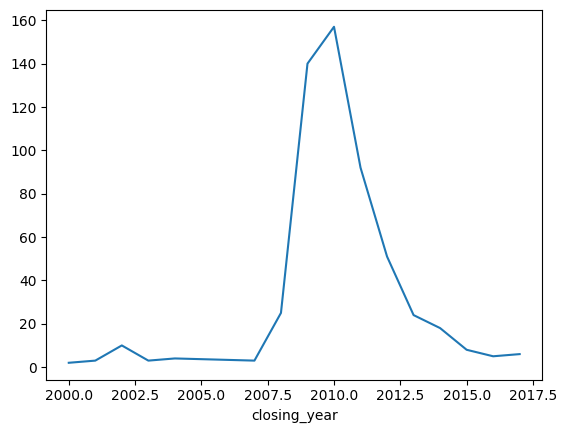

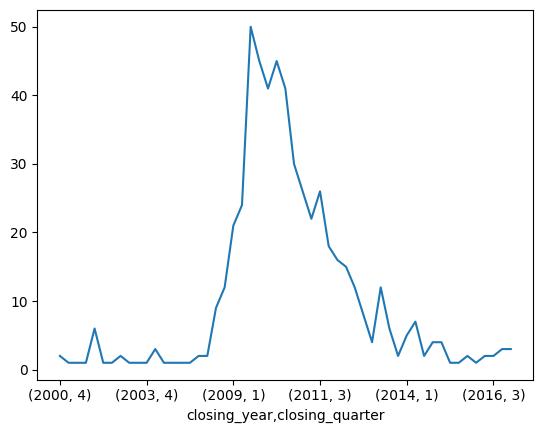

In [56]:
#그래프
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax = closing_year.plot()
plt.show()

fig, ax = plt.subplots()
ax = closing_year_q.plot()
plt.show()

테슬라 주식 데이터 분석(시간 계산)

In [57]:
pip install pandas-datareader

In [62]:
import yfinance as yf

tesla = yf.download('TSLA') # 데이터프레임 저장
tesla.to_csv('/content/tesla_stock_yfinance.csv')

[*********************100%***********************]  1 of 1 completed


In [63]:
print(tesla.head())

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500


In [64]:
tesla = pd.read_csv('/content/tesla_stock_yfinance.csv', parse_dates=[0])
print(tesla.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3582 entries, 0 to 3581
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3582 non-null   datetime64[ns]
 1   Open       3582 non-null   float64       
 2   High       3582 non-null   float64       
 3   Low        3582 non-null   float64       
 4   Close      3582 non-null   float64       
 5   Adj Close  3582 non-null   float64       
 6   Volume     3582 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 196.0 KB
None


In [65]:
#date 열의 자료형이 datetime오브젝트로 변환됨 -> dt 접근자 사용 가능
print(tesla.loc[(tesla.Date.dt.year == 2010) & (tesla.Date.dt.month == 6)])

        Date      Open      High       Low     Close  Adj Close     Volume
0 2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
1 2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500


# **datetime 오브젝트와 인덱스 - datetimeindex**
- datetime 오브젝트를 인덱스롤 지정

In [66]:
#date열을 tesla 데이터프레임의 인덱스로 지정
tesla.index = tesla['Date']
print(tesla.index)

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2024-09-09', '2024-09-10', '2024-09-11', '2024-09-12',
               '2024-09-13', '2024-09-16', '2024-09-17', '2024-09-18',
               '2024-09-19', '2024-09-20'],
              dtype='datetime64[ns]', name='Date', length=3582, freq=None)


In [71]:
#datetime 오브젝트를 인덱스로 지정하면 원하는 시간의 데이터를 바로 추출할 수 있음
print(tesla.loc['2015'].iloc[:5, :5])

                 Date       Open       High        Low      Close
Date                                                             
2015-01-02 2015-01-02  14.858000  14.883333  14.217333  14.620667
2015-01-05 2015-01-05  14.303333  14.433333  13.810667  14.006000
2015-01-06 2015-01-06  14.004000  14.280000  13.614000  14.085333
2015-01-07 2015-01-07  14.223333  14.318667  13.985333  14.063333
2015-01-08 2015-01-08  14.187333  14.253333  14.000667  14.041333


In [72]:
print(tesla.loc['2010-06'].iloc[:, :5])

                 Date      Open      High       Low     Close
Date                                                         
2010-06-29 2010-06-29  1.266667  1.666667  1.169333  1.592667
2010-06-30 2010-06-30  1.719333  2.028000  1.553333  1.588667


# **시간 간격과 인덱스 - timedeltalndex**
- 시간 간격을 인덱스로 지정하여 데이터 추출

In [73]:
#date열에서 최솟값을 뺀 다음 ref_date열로 추가
tesla['ref_date'] = tesla['Date'] - tesla['Date'].min()
print(tesla.head())

                 Date      Open      High       Low     Close  Adj Close  \
Date                                                                       
2010-06-29 2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667   
2010-06-30 2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667   
2010-07-01 2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000   
2010-07-02 2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   
2010-07-06 2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000   

               Volume ref_date  
Date                            
2010-06-29  281494500   0 days  
2010-06-30  257806500   1 days  
2010-07-01  123282000   2 days  
2010-07-02   77097000   3 days  
2010-07-06  103003500   7 days  


In [74]:
#ref_date를 이용하여 데이터 추출
tesla.index = tesla['ref_date']
print(tesla.iloc[:5, :5])

               Date      Open      High       Low     Close
ref_date                                                   
0 days   2010-06-29  1.266667  1.666667  1.169333  1.592667
1 days   2010-06-30  1.719333  2.028000  1.553333  1.588667
2 days   2010-07-01  1.666667  1.728000  1.351333  1.464000
3 days   2010-07-02  1.533333  1.540000  1.247333  1.280000
7 days   2010-07-06  1.333333  1.333333  1.055333  1.074000


In [75]:
#최초 5일의 데이터 추출
print(tesla['5 days':].iloc[:5, :5])

               Date      Open      High       Low     Close
ref_date                                                   
7 days   2010-07-06  1.333333  1.333333  1.055333  1.074000
8 days   2010-07-07  1.093333  1.108667  0.998667  1.053333
9 days   2010-07-08  1.076000  1.168000  1.038000  1.164000
10 days  2010-07-09  1.172000  1.193333  1.103333  1.160000
13 days  2010-07-12  1.196667  1.204667  1.133333  1.136667


**시간 범위와 인덱스**
- 누락된 데이터를 포함시켜 데이터를 살펴보기 위해서는임의로 시간 범위를 생성하여 인덱스로 지정해야함

In [76]:
#에볼라 데이터는 2015/01/01의 데이터가 누락됨
ebola = pd.read_csv('/content/drive/MyDrive/country_timeseries.csv', parse_dates=[0])
print(ebola.iloc[:5, :5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0


In [79]:
#2014/03/23의 데이터 또한 누락
print(ebola.iloc[-5:, :5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


In [80]:
#date_range 메서드를 이용하여 시간 인덱스 생성
head_range = pd.date_range(start='2014-12-31', end='2015-01-05')
print(head_range)

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')


In [81]:
#데이터 손상 방지를 위해 데이터프레임의 앞쪽 5개의 데이터를 추출하여 새로운 데이터프레임 생성
ebola_5 = ebola.head()
ebola_5.index = ebola_5['Date']
ebola_5.reindex(head_range)
print(ebola_5.iloc[:5, :5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2015-01-05 2015-01-05  289        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286           NaN         8157.0                NaN
2014-12-31 2014-12-31  284        2730.0         8115.0             9633.0


**시간 범위의 주기 설정하기**
- 시간 범위를 인덱스로 지정하면 datetimeindex자료형이 만들어짐
- datetimeindex에는 freq 속성이 포함되어 있고, freq 속성값을 지정하면 시간 간격을 조절하여 datetimeindex를 만들 수 있음

In [82]:
print(pd.date_range('2017-01-01', '2017-01-07', freq='B'))

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06'],
              dtype='datetime64[ns]', freq='B')


# **시간 범위 수정하고 데이터 밀어내기 - shift 메서드**


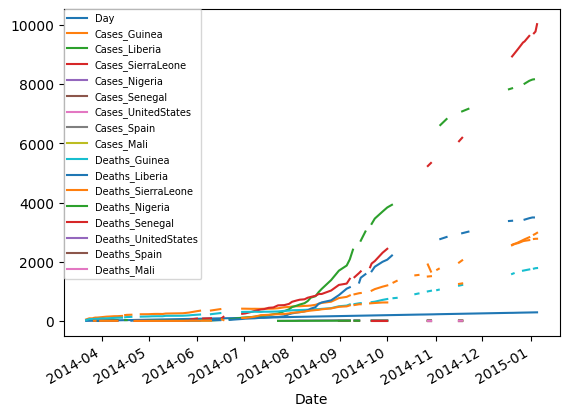

In [83]:
#x축을 date열로, y축을 사망자 수로 지정

import matplotlib.pyplot as plt
ebola.index = ebola['Date']
fig, ax = plt.subplots()
ax = ebola.iloc[0:, 1:].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show()

In [85]:
#각 나라의 발병일을 가장 처음 에볼라가 발병한 guinea와 동일한 위치로 옮겨야 제대로 비교할 수 있음
ebola_sub = ebola[['Day', 'Cases_Guinea', 'Cases_Liberia']]
print(ebola_sub.tail(10))

            Day  Cases_Guinea  Cases_Liberia
Date                                        
2014-04-04   13         143.0           18.0
2014-04-01   10         127.0            8.0
2014-03-31    9         122.0            8.0
2014-03-29    7         112.0            7.0
2014-03-28    6         112.0            3.0
2014-03-27    5         103.0            8.0
2014-03-26    4          86.0            NaN
2014-03-25    3          86.0            NaN
2014-03-24    2          86.0            NaN
2014-03-22    0          49.0            NaN


In [101]:
#존재하지 않는 날짜 데이터까지 포함시켜야 확산 속도를 제대로 비교할 수 있음
ebola = pd.read_csv('/content/drive/MyDrive/country_timeseries.csv',parse_dates=['Date'])
print(ebola.head().iloc[:, :5])
print(ebola.tail().iloc[:, :5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0
          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


In [102]:
#date열의 최댓값과 최솟값으로 시간 범위를 생성하여 new_idx에 저장 -> 날짜가 아예 없었던 데이터의 인덱스를 생성할 수 있음
ebola.index = ebola['Date']
new_idx = pd.date_range(ebola.index.min(), ebola.index.max())

In [103]:
#시간 순서를 맞추기 위해 reversed 메서드를 사용
print(new_idx)

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')


In [104]:
new_idx = reversed(new_idx)

In [105]:
#reindex 메서드를 이용하여 새로 생성한 인덱스를 새로운 인덱스로 지정
ebola = ebola.reindex(new_idx)
print(ebola.head().iloc[:, :5])

                 Date    Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                        
2015-01-05 2015-01-05  289.0        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288.0        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287.0        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286.0           NaN         8157.0                NaN
2015-01-01        NaT    NaN           NaN            NaN                NaN


In [106]:
print(ebola.tail().iloc[:, :5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2014-03-26 2014-03-26  4.0          86.0            NaN                NaN
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN
2014-03-24 2014-03-24  2.0          86.0            NaN                NaN
2014-03-23        NaT  NaN           NaN            NaN                NaN
2014-03-22 2014-03-22  0.0          49.0            NaN                NaN


In [120]:
#last_valid_index, first_valid_index메서드를 사용하여 각 나라의 에볼라 발병일을 구함
last_valid = ebola.apply(pd.Series.last_valid_index)
print(last_valid)

Date                  2014-03-22
Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]


In [121]:
first_valid = ebola.apply(pd.Series.first_valid_index)
print(first_valid)

Date                  2015-01-05
Day                   2015-01-05
Cases_Guinea          2015-01-05
Cases_Liberia         2015-01-03
Cases_SierraLeone     2015-01-05
Cases_Nigeria         2014-12-07
Cases_Senegal         2014-12-07
Cases_UnitedStates    2014-12-07
Cases_Spain           2014-12-07
Cases_Mali            2014-12-07
Deaths_Guinea         2015-01-05
Deaths_Liberia        2015-01-03
Deaths_SierraLeone    2015-01-05
Deaths_Nigeria        2014-12-07
Deaths_Senegal        2014-12-07
Deaths_UnitedStates   2014-12-07
Deaths_Spain          2014-12-07
Deaths_Mali           2014-12-07
dtype: datetime64[ns]


In [126]:
earliest_date = ebola.index.min()
print(earliest_date)

shift_values = last_valid - earliest_date
print(shift_values)

2014-03-22 00:00:00
Date                    0 days
Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
dtype: timedelta64[ns]


In [130]:
ebola_dict = {}
for idx, col in enumerate(ebola):
  d = shift_values[idx].days
  shifted = ebola[col].shift(d)
  ebola_dict[col] = shifted

<ipython-input-130-a7363186ba3f>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  d = shift_values[idx].days


In [131]:
ebola_shift = pd.DataFrame(ebola_dict)

In [132]:
print(ebola_shift.tail())

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
Date                                                                         
2014-03-26 2014-03-26  4.0          86.0            8.0                2.0   
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN   
2014-03-24 2014-03-24  2.0          86.0            7.0                NaN   
2014-03-23        NaT  NaN           NaN            3.0                2.0   
2014-03-22 2014-03-22  0.0          49.0            8.0                6.0   

            Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
Date                                                                        
2014-03-26            1.0            NaN                 1.0          1.0   
2014-03-25            NaN            NaN                 NaN          NaN   
2014-03-24            NaN            NaN                 NaN          NaN   
2014-03-23            NaN            NaN                 NaN        

In [133]:
ebola_shift.indwx = ebola_shift['Day']
ebola_shift = ebola_shift.drop(['Date', 'Day'],axis=1)

print(ebola_shift.tail())

            Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_Nigeria  \
Date                                                                        
2014-03-26          86.0            8.0                2.0            1.0   
2014-03-25          86.0            NaN                NaN            NaN   
2014-03-24          86.0            7.0                NaN            NaN   
2014-03-23           NaN            3.0                2.0            NaN   
2014-03-22          49.0            8.0                6.0            0.0   

            Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
Date                                                                     
2014-03-26            NaN                 1.0          1.0         NaN   
2014-03-25            NaN                 NaN          NaN         NaN   
2014-03-24            NaN                 NaN          NaN         NaN   
2014-03-23            NaN                 NaN          NaN         NaN   
2014-03-22      

<ipython-input-133-2d1a79a297a5>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  ebola_shift.indwx = ebola_shift['Day']


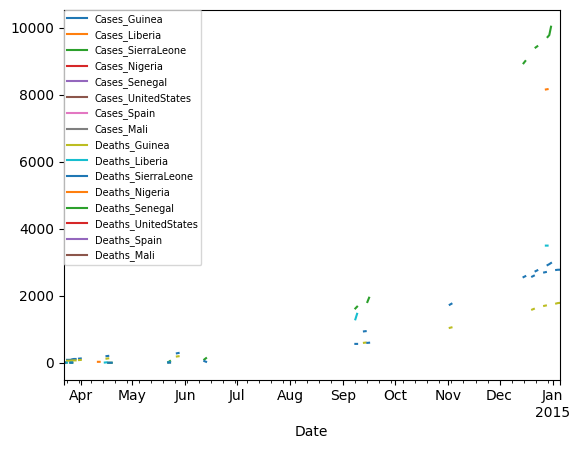

In [134]:
fig, ax = plt.subplots()
ax = ebola_shift.iloc[:, :].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show()